In [63]:
import numpy as np
from scipy.misc import imresize
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import transform, filters
import sys, pylab, operator, csv
#import util
import os
import urllib

%matplotlib notebook

%load_ext autoreload
%autoreload 2

import caffe

from helpers import *
from heatmaps import *
#from repro_EB_figs import *
from optimize_mask import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
gpu = 0
net_type = 'googlenet'

In [77]:
caffe.set_device(gpu)
caffe.set_mode_gpu()

googlenet = get_net(net_type)
net = googlenet

# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

[autoreload of heatmaps failed: Traceback (most recent call last):
  File "/users/ruthfong/anaconda2/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "heatmaps.py", line 359
    assert(heatmap_type == 'mask' or heatmap_type == 'saliency' or heatmap_type == 'guided_backprop' or heatmap_type == 'excitation_backprop' or heatmap_type = 'occlusion'
                                                                                                                                                              ^
SyntaxError: invalid syntax
]


data	(1, 3, 224, 224)
conv1/7x7_s2	(10, 64, 112, 112)
pool1/3x3_s2	(10, 64, 56, 56)
pool1/norm1	(10, 64, 56, 56)
conv2/3x3_reduce	(10, 64, 56, 56)
conv2/3x3	(10, 192, 56, 56)
conv2/norm2	(10, 192, 56, 56)
pool2/3x3_s2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_0	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_1	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_3	(10, 192, 28, 28)
inception_3a/1x1	(10, 64, 28, 28)
inception_3a/3x3_reduce	(10, 96, 28, 28)
inception_3a/3x3	(10, 128, 28, 28)
inception_3a/5x5_reduce	(10, 16, 28, 28)
inception_3a/5x5	(10, 32, 28, 28)
inception_3a/pool	(10, 192, 28, 28)
inception_3a/pool_proj	(10, 32, 28, 28)
inception_3a/output	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_0	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_1	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_2	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_spl

In [13]:
net = get_net('googlenet_coco')

for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

list(net._layer_names)

data	(1, 3, 224, 224)
conv1/7x7_s2	(10, 64, 112, 112)
pool1/3x3_s2	(10, 64, 56, 56)
pool1/norm1	(10, 64, 56, 56)
conv2/3x3_reduce	(10, 64, 56, 56)
conv2/3x3	(10, 192, 56, 56)
conv2/norm2	(10, 192, 56, 56)
pool2/3x3_s2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_0	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_1	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_3	(10, 192, 28, 28)
inception_3a/1x1	(10, 64, 28, 28)
inception_3a/3x3_reduce	(10, 96, 28, 28)
inception_3a/3x3	(10, 128, 28, 28)
inception_3a/5x5_reduce	(10, 16, 28, 28)
inception_3a/5x5	(10, 32, 28, 28)
inception_3a/pool	(10, 192, 28, 28)
inception_3a/pool_proj	(10, 32, 28, 28)
inception_3a/output	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_0	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_1	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_2	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_spl

['input',
 'conv1/7x7_s2',
 'conv1/relu_7x7',
 'pool1/3x3_s2',
 'pool1/norm1',
 'conv2/3x3_reduce',
 'conv2/relu_3x3_reduce',
 'conv2/3x3',
 'conv2/relu_3x3',
 'conv2/norm2',
 'pool2/3x3_s2',
 'pool2/3x3_s2_pool2/3x3_s2_0_split',
 'inception_3a/1x1',
 'inception_3a/relu_1x1',
 'inception_3a/3x3_reduce',
 'inception_3a/relu_3x3_reduce',
 'inception_3a/3x3',
 'inception_3a/relu_3x3',
 'inception_3a/5x5_reduce',
 'inception_3a/relu_5x5_reduce',
 'inception_3a/5x5',
 'inception_3a/relu_5x5',
 'inception_3a/pool',
 'inception_3a/pool_proj',
 'inception_3a/relu_pool_proj',
 'inception_3a/output',
 'inception_3a/output_inception_3a/output_0_split',
 'inception_3b/1x1',
 'inception_3b/relu_1x1',
 'inception_3b/3x3_reduce',
 'inception_3b/relu_3x3_reduce',
 'inception_3b/3x3',
 'inception_3b/relu_3x3',
 'inception_3b/5x5_reduce',
 'inception_3b/relu_5x5_reduce',
 'inception_3b/5x5',
 'inception_3b/relu_5x5',
 'inception_3b/pool',
 'inception_3b/pool_proj',
 'inception_3b/relu_pool_proj',
 'ince

In [14]:
labels_desc = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synset_words.txt', str, delimiter='\t')
(paths, labels) = read_imdb('/home/ruthfong/packages/caffe/data/ilsvrc12/val_imdb.txt')
paths = np.array(paths)
labels = np.array(labels)
data_desc = 'val'
res_dir = '/data/ruthfong/neural_coding/results_reb/occ_masks_imagenet_googlenet_val_defaults/'
mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
mask_paths = np.array([os.path.join(mask_dir, '%d.npy' % x) for x in range(len(labels))])

In [15]:
transformer = get_ILSVRC_net_transformer(net)

In [16]:
img = transformer.preprocess('data', caffe.io.load_image(paths[0]))
img.shape

(3, 224, 224)

In [17]:
print labels[0], labels_desc[labels[0]]
print labels[2], labels_desc[labels[2]]

65 n01751748 sea snake
230 n02105855 Shetland sheepdog, Shetland sheep dog, Shetland


In [42]:
net = googlenet
transformer = get_ILSVRC_net_transformer(net)

0 2.18269e-07 0.0466774


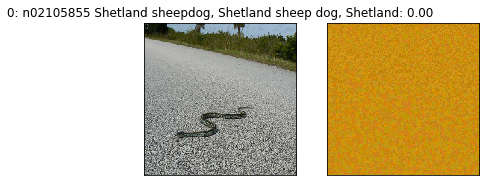

1 5.74612e-07 0.0801504
2 1.36086e-06 0.121978
3 2.97556e-06 0.155007
4 5.99637e-06 0.166561
5 1.18732e-05 0.16075
6 2.30156e-05 0.141247
7 4.32418e-05 0.127879
8 8.16027e-05 0.103394
9 0.000143511 0.0808738
10 0.000239131 0.070841


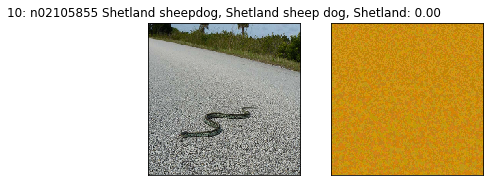

11 0.000383771 0.0535142
12 0.000573482 0.0450102
13 0.000821005 0.0345469
14 0.00114433 0.0264958
15 0.00154284 0.0188576
16 0.00211664 0.0142196
17 0.00288226 0.00986244
18 0.00378869 0.00659814
19 0.00495144 0.00481613
20 0.00640746 0.00385887


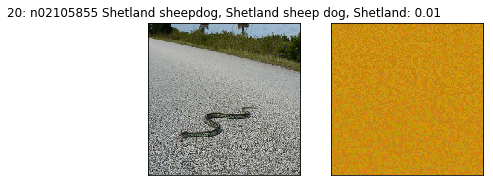

21 0.00825681 0.00244665
22 0.0105055 0.00239535
23 0.0133021 0.00176508
24 0.0166372 0.00185871
25 0.0206682 0.00109818
26 0.0258998 0.00151592
27 0.031474 0.000770003
28 0.040483 0.000910536
29 0.0511061 0.000632822
30 0.0653887 0.000644871


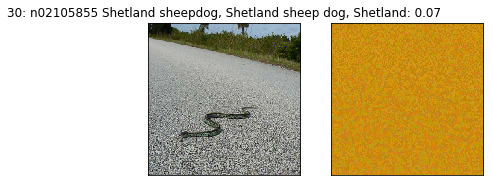

31 0.0829356 0.000473081
32 0.108573 0.000431676
33 0.139262 0.000245933
34 0.181196 0.000217904
35 0.226529 0.000158541
36 0.283422 0.000132867
37 0.34643 8.34739e-05
38 0.418541 6.51614e-05
39 0.483574 3.55444e-05
40 0.554204 3.73195e-05


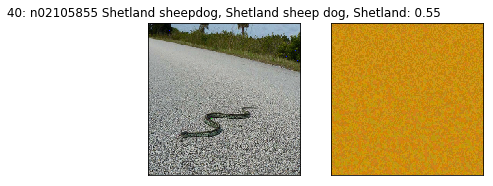

41 0.618228 1.59796e-05
42 0.680671 1.8365e-05
43 0.732293 6.30076e-06
44 0.786852 7.3389e-06
45 0.82823 2.72371e-06
46 0.865632 2.55346e-06
47 0.893108 9.55512e-07
48 0.91497 1.00766e-06
49 0.932445 2.97542e-07
50 0.945981 2.8379e-07


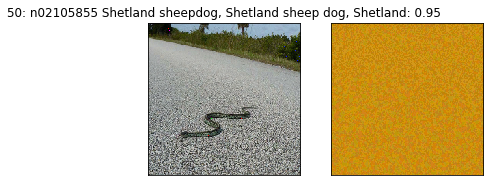

51 0.956452 9.55551e-08
52 0.964096 1.22576e-07
53 0.970755 3.59502e-08
54 0.975616 5.16936e-08
55 0.980048 1.43826e-08
56 0.983438 2.19915e-08
57 0.986556 6.15207e-09
58 0.988519 1.01142e-08
59 0.990345 3.0682e-09


In [58]:
%matplotlib inline

ind = 5
adv_ind = 2
true_path = paths[ind]
true_label = labels[ind]
adv_label = labels[adv_ind] 

img = transformer.preprocess('data', caffe.io.load_image(true_path))

# dummy pass
net.blobs['data'].data[...] = img
net.forward()

adv_grad = np.zeros(net.blobs['prob'].data.shape) # (1,1000)
adv_grad[0][adv_label] = 1

top = 'prob'
lr = 0.1
acc_img = img
grad = np.zeros(img.shape)
#f, ax = plt.subplots(1,1)
for i in range(60):
    acc_img += np.sign(grad)*lr
    #acc_img = img + lr*np.sign(grad)
    net.blobs['data'].data[...] = acc_img
    net.forward(start = 'data', end = top)
    true_score = net.blobs[top].data[0][true_label].copy()
    adv_score = net.blobs[top].data[0][adv_label].copy()
    net.blobs[top].diff[...] = adv_grad
    net.backward(start = top, end = 'data')
    grad = np.squeeze(net.blobs['data'].diff.copy())
    
    print i, adv_score, true_score

    if i % 10 == 0:
        f, ax = plt.subplots(1,2)
        ax[0].imshow(transformer.deprocess('data', acc_img))
        ax[0].set_title('%d: %s: %.2f' % (i, labels_desc[adv_label], adv_score))
        ax[1].imshow(10*transformer.deprocess('data', np.sign(grad)))
        for a in ax:
            a.set_xticks([])
            a.set_yticks([])
        #f.canvas.draw()
        #time.sleep(1e-2)
        plt.show()
    

In [59]:
adv_img = transformer.deprocess('data', acc_img)
import scipy.misc
scipy.misc.imsave('adv_img.png', adv_img)

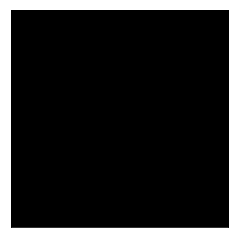

In [60]:
%matplotlib inline
f, ax = plt.subplots(1,1)
ax.imshow(adv_img - transformer.deprocess('data', img))
ax.set_xticks([])
ax.set_yticks([])
plt.show()

0.989655


<IPython.core.display.Javascript object>


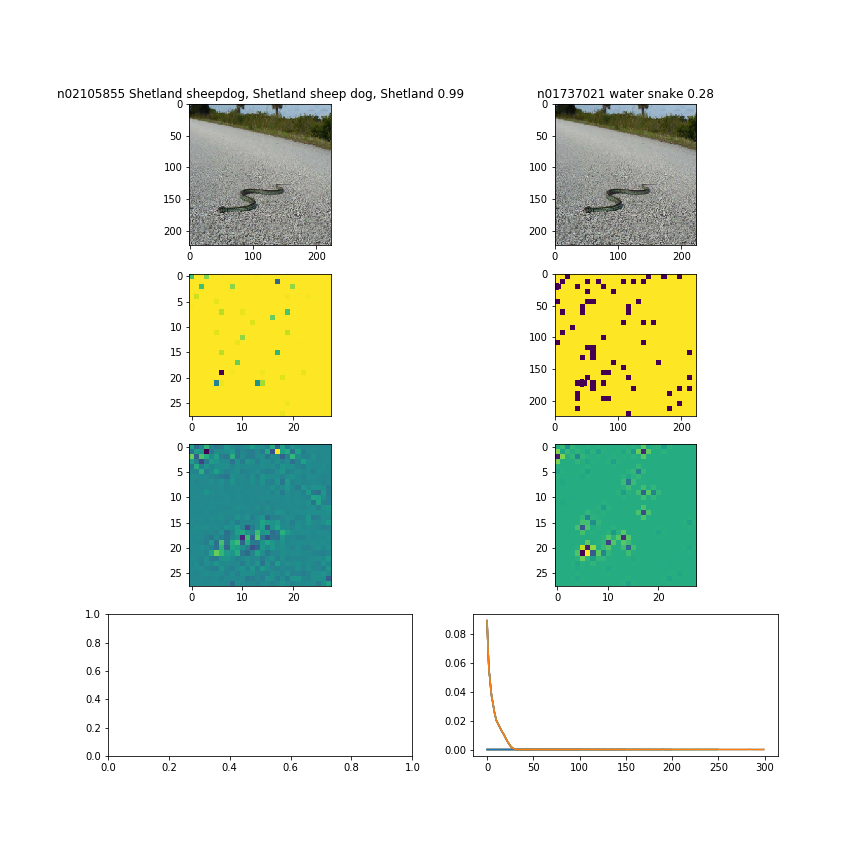

plot
plot
plot
plot
plot
plot


array([[ 0.99814825,  1.        ,  1.        ,  0.99886416,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.99990552,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.99591726,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.99814426,  0.99995668,  1.        ,
         1.        ,  1.        ,  1.        ,  0.99892639,  1.        ,
         1.        ,  1.    

In [62]:
%matplotlib notebook

# default parameters
num_iters = 300
lr = 1e-1
l1_lambda = 1e-4
l1_ideal = 1
l1_lambda_2 = 0
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 0
noise = 0
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 5
mask_scale = 8

#mask_init = None
plot_step = 50
debug = False
verbose = False
mask_init_type = 'circle'

show_fig = True

#net = get_net(net_type)
net.blobs['data'].data.reshape(1,3,224,224)

path = 'adv_img.png'
label = adv_label
img = transformer.preprocess('data', caffe.io.load_image(path))
net.blobs['data'].data[...] = img
net.forward()
scores = np.squeeze(net.blobs['prob'].data)
print scores[label]
sorted_idx = np.argsort(scores)
if given_gradient:
    target = np.zeros(scores.shape)
    target[sorted_idx[:-(num_top+1):-1]] = 1
else:
    target = sorted_idx[:-(num_top+1):-1]

fig_path = None
mask_path = None

#fig_path = os.path.join(fig_dir, '%d_%d.png' % (int(path.strip('.jpg').split('_')[-1]), label))
#mask_path = os.path.join(mask_dir, '%d_%d.npy' % (int(path.strip('.jpg').split('_')[-1]), label))

#generate_learned_mask(net, net_transformer, path, label, fig_path = fig_path, mask_path = mask_path, gpu = gpu, show_fig = show_fig, 
#            num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = l1_ideal, l1_lambda_2 = l1_lambda_2, 
#            tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale, use_conv_norm = use_conv_norm, blur_mask = blur_mask,
#            jitter = jitter, noise = noise, null_type = null_type, end_layer = end_layer, num_top = num_top, labels = labels_desc)
generate_learned_mask(net, transformer, path, label, given_gradient = given_gradient, 
                      norm_score = norm_score, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, 
                      l1_ideal = l1_ideal, l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, 
                      mask_scale = mask_scale, use_conv_norm = use_conv_norm, blur_mask = blur_mask, 
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, 
                      start_layer = 'data', end_layer = 'prob', plot_step = plot_step, debug = debug, 
                      fig_path = fig_path, mask_path = mask_path, verbose = verbose, show_fig = show_fig, 
                      mask_init_type = mask_init_type, num_top = num_top, labels = labels_desc)
    #mask = optimize_mask(net, path, target, labels = labels_desc, given_gradient = given_gradient, norm_score = norm_score,
    #                num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = l1_ideal,
    #                l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale,
    #                use_conv_norm= use_conv_norm, blur_mask = blur_mask, jitter = jitter,
    #                null_type = null_type, mask_init = mask_init, gpu = gpu, start_layer = None, end_layer = end_layer,
    #                plot_step = plot_step, debug = debug, fig_path = fig_path, mask_path = mask_path, verbose = verbose)

In [8]:
for i in find_labels('tiger'):
    print i, labels_desc[i]

3 n01491361 tiger shark, Galeocerdo cuvieri
282 n02123159 tiger cat
292 n02129604 tiger, Panthera tigris
300 n02165105 tiger beetle


In [25]:
#alexnet = get_net('alexnet')
from defaults import alexnet_prototxt, alexnet_model
alexnet = caffe.Net(alexnet_prototxt, alexnet_model, caffe.TEST)
# for each layer, show the output shape
for layer_name, blob in alexnet.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 227, 227)
conv1	(10, 96, 55, 55)
relu1	(10, 96, 55, 55)
norm1	(10, 96, 55, 55)
pool1	(10, 96, 27, 27)
conv2	(10, 256, 27, 27)
relu2	(10, 256, 27, 27)
norm2	(10, 256, 27, 27)
pool2	(10, 256, 13, 13)
conv3	(10, 384, 13, 13)
relu3	(10, 384, 13, 13)
conv4	(10, 384, 13, 13)
relu4	(10, 384, 13, 13)
conv5	(10, 256, 13, 13)
relu5	(10, 256, 13, 13)
pool5	(10, 256, 6, 6)
fc6	(10, 4096)
fc7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


In [29]:
#vgg_net = get_net('vgg16')
from defaults import vgg16_prototxt, vgg16_model
vgg_net = caffe.Net(vgg16_prototxt, vgg16_model, caffe.TRAIN)
# for each layer, show the output shape
for layer_name, blob in vgg_net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 224, 224)
conv1_1	(10, 64, 224, 224)
relu1_1	(10, 64, 224, 224)
conv1_2	(10, 64, 224, 224)
relu1_2	(10, 64, 224, 224)
pool1	(10, 64, 112, 112)
conv2_1	(10, 128, 112, 112)
relu2_1	(10, 128, 112, 112)
conv2_2	(10, 128, 112, 112)
relu2_2	(10, 128, 112, 112)
pool2	(10, 128, 56, 56)
conv3_1	(10, 256, 56, 56)
relu3_1	(10, 256, 56, 56)
conv3_2	(10, 256, 56, 56)
relu3_2	(10, 256, 56, 56)
conv3_3	(10, 256, 56, 56)
relu3_3	(10, 256, 56, 56)
pool3	(10, 256, 28, 28)
conv4_1	(10, 512, 28, 28)
relu4_1	(10, 512, 28, 28)
conv4_2	(10, 512, 28, 28)
relu4_2	(10, 512, 28, 28)
conv4_3	(10, 512, 28, 28)
relu4_3	(10, 512, 28, 28)
pool4	(10, 512, 14, 14)
conv5_1	(10, 512, 14, 14)
relu5_1	(10, 512, 14, 14)
conv5_2	(10, 512, 14, 14)
relu5_2	(10, 512, 14, 14)
conv5_3	(10, 512, 14, 14)
relu5_3	(10, 512, 14, 14)
pool5	(10, 512, 7, 7)
fc6	(10, 4096)
relu6	(10, 4096)
drop6	(10, 4096)
fc7	(10, 4096)
relu7	(10, 4096)
drop7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


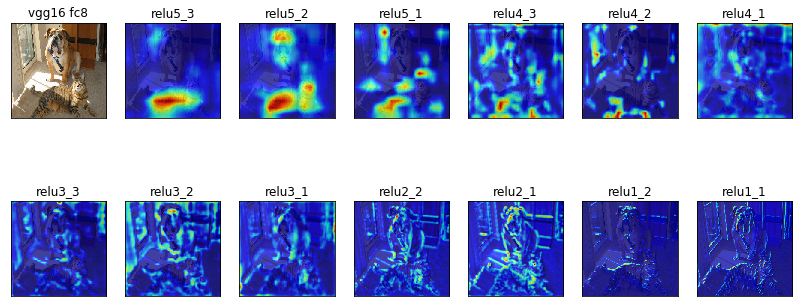

In [30]:
path = '../../../images/COCO_train2014_000000114269.jpg'
label = 282 # tiger cat
img = transformer.preprocess('data', caffe.io.load_image(path))

top_name = 'fc8'
norm_deg = None

net_type = 'vgg16'

if net_type == 'alexnet':
    net = alexnet
    bottom_names = ['relu5', 'relu4', 'relu3', 'relu2', 'relu1']
elif net_type == 'vgg16':
    net = vgg_net
    #bottom_names = ['conv5_3', 'conv4_3', 'conv3_3', 'conv2_2', 'conv1_2'] #vgg16
    bottom_names = ['relu5_3','relu5_2','relu5_1', 'relu4_3','relu4_2', 'relu4_1', 'relu3_3', 'relu3_2', 'relu3_1',
                    'relu2_2', 'relu2_1','relu1_2', 'relu1_1'] #vgg16
elif net_type == 'googlenet':
    net = googlnet

transformer = get_ILSVRC_net_transformer(net)

if net_type == 'vgg16':
    f, ax = plt.subplots(2,7)
    f.set_size_inches(14,6)
elif net_type == 'alexnet':
    f, ax = plt.subplots(1,6)
    f.set_size_inches(12,4)

for i in range(len(bottom_names)+1):
    curr_ax = ax[i/7][i%7] if net_type == 'vgg16' else ax[i]
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])
    curr_ax.imshow(transformer.deprocess('data', img))
    
    if i == 0:
        curr_ax.set_title('%s %s' % (net_type, top_name))
        continue
        
    bottom_name = bottom_names[i-1]
    heatmap = compute_heatmap(net, transformer, path, label, heatmap_type = 'grad_cam', topBlobName = top_name, 
                    topLayerName = top_name,
                        outputBlobName = bottom_name, outputLayerName = bottom_name, secondTopBlobName = 'pool5/7x7_s1',
                        secondTopLayerName = 'pool5/7x7_s1', norm_deg = norm_deg, gpu = 0)
    
    curr_ax.imshow(imresize(heatmap, img.shape[1:]), alpha = 0.75, cmap = 'jet')
    #f.colorbar(cax)
    curr_ax.set_title('%s' % bottom_name)
plt.show()


In [21]:
from grad_cam_caffe import doGradCAM

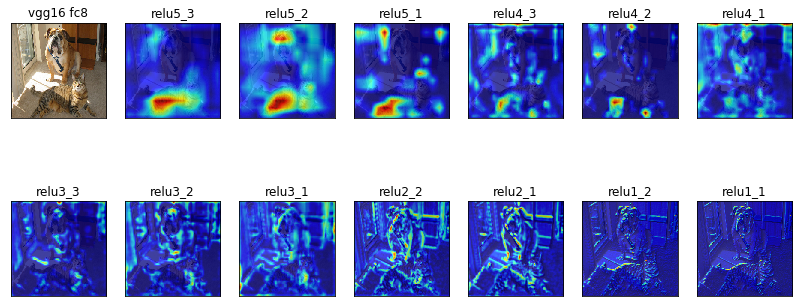

In [24]:
path = '../../../images/COCO_train2014_000000114269.jpg'
label = 282 # tiger cat
img = transformer.preprocess('data', caffe.io.load_image(path))

net_type = 'vgg16'
top_name = 'fc8'

if net_type == 'vgg16':
    f, ax = plt.subplots(2,7)
    f.set_size_inches(14,6)

if net_type == 'vgg16':
    bottom_names = ['relu5_3','relu5_2','relu5_1', 'relu4_3','relu4_2', 'relu4_1', 'relu3_3', 'relu3_2', 'relu3_1',
                        'relu2_2', 'relu2_1','relu1_2', 'relu1_1']

for i in range(len(bottom_names)+1):
    curr_ax = ax[i/7][i%7] if net_type == 'vgg16' else ax[i]
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])
    curr_ax.imshow(transformer.deprocess('data', img))
    
    if i == 0:
        curr_ax.set_title('%s %s' % (net_type, top_name))
        continue
        
    bottom_name = bottom_names[i-1]
    heatmap = doGradCAM(vgg_net, img, label, top = top_name, bottom = bottom_names[i-1])
    
    curr_ax.imshow(heatmap, alpha = 0.75, cmap = 'jet')
    #f.colorbar(cax)
    curr_ax.set_title('%s' % bottom_name)
plt.show()

/users/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


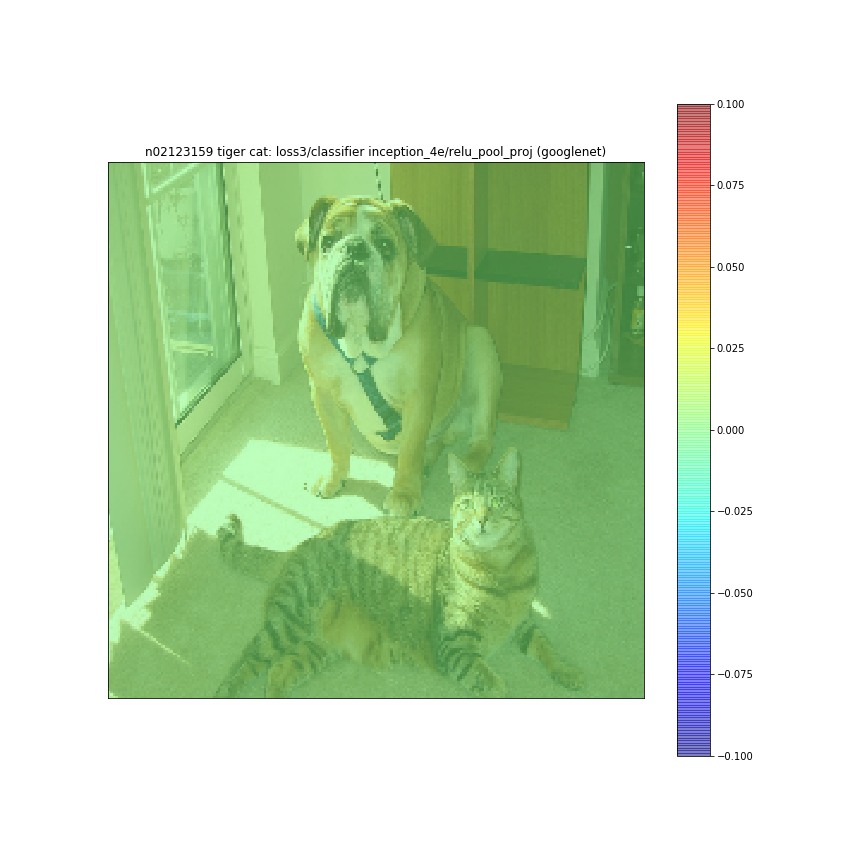

In [71]:
net_type = 'googlenet'

if net_type == 'alexnet':
    net = alexnet
elif net_type == 'vgg16':
    net = vgg_net
elif net_type == 'googlenet':
    net = googlenet
transformer = get_ILSVRC_net_transformer(net)

path = '../../../images/COCO_train2014_000000114269.jpg'
#path = '../../../images/multi_animals.png'
#label = 281 # tabby cat
#label = 232 # border collie
#label = 242 # boxer
label = 282 # tiger cat

img = transformer.preprocess('data', caffe.io.load_image(path))

#top_name = 'prob'
top_name = 'fc8'

if net_type == 'alexnet':
    bottom_name = 'conv5'
    bottom_blob = 'conv5'
elif net_type == 'vgg16':
    bottom_name = 'conv5_3'
    bottom_blob = 'conv5_3'
elif net_type == 'googlenet':
    top_name = 'loss3/classifier'
    bottom_name = 'inception_4e/relu_pool_proj'
    bottom_blob = 'inception_4e/relu_pool_proj'

net.blobs['data'].data[...] = transformer.preprocess('data', 
                                                caffe.io.load_image(path))
net.forward(end = bottom_name)
net.blobs[top_name].diff[0][...] = 0
net.blobs[top_name].diff[0][label] = 1
net.backward(start = top_name, end = bottom_blob)
activations = net.blobs[bottom_blob].data
gradient = net.blobs[bottom_blob].diff
alphas = np.mean(gradient,(2,3))
heatmap = np.squeeze(np.maximum(np.sum(activations * np.broadcast_to(
    np.expand_dims(np.expand_dims(alphas, 2),3), activations.shape), 1), 0))
#heatmap = np.zeros(activations.shape[2:], dtype=np.float32)
#for i in range(activations.shape[1]):
#    heatmap += activations[0,i,:,:] * alphas[0,i]
#heatmap = np.maximum(heatmap, 0)

heatmap = np.true_divide(heatmap-np.min(heatmap),np.max(heatmap) - np.min(heatmap))

f, ax = plt.subplots(1,1)
ax.imshow(transformer.deprocess('data', img))
cax = ax.imshow(imresize(heatmap, img.shape[1:], 'bilinear'), alpha = 0.5, cmap = 'jet')
f.colorbar(cax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('%s: %s %s (%s)' % (labels_desc[label], top_name, bottom_name, net_type))
plt.show()

In [82]:
np.max(heatmap)

0.005603129

In [65]:
print np.array_equal(activations, np.maximum(net.blobs[bottom_blob].data, 0))
np.where(gradient < 0)

True


(array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   2, ..., 511, 511, 511]),
 array([ 3,  4,  4, ...,  5,  6, 10]),
 array([5, 5, 9, ..., 9, 5, 3]))

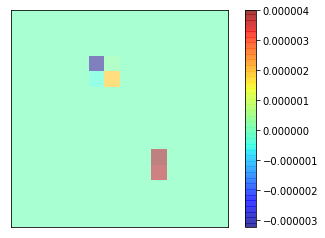

In [62]:
f, ax = plt.subplots(1,1)
#ax.imshow(transformer.deprocess('data', img))
cax = ax.imshow(gradient[0,0], alpha=0.5, cmap='jet')
#cax = ax.imshow(imresize(gradient[0,0], img.shape[1:]), alpha = 0.5, cmap = 'jet')
f.colorbar(cax)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [44]:
for (i,j) in net.layers.iteritems():
    print i, j

AttributeError: 'LayerVec' object has no attribute 'iteritems'

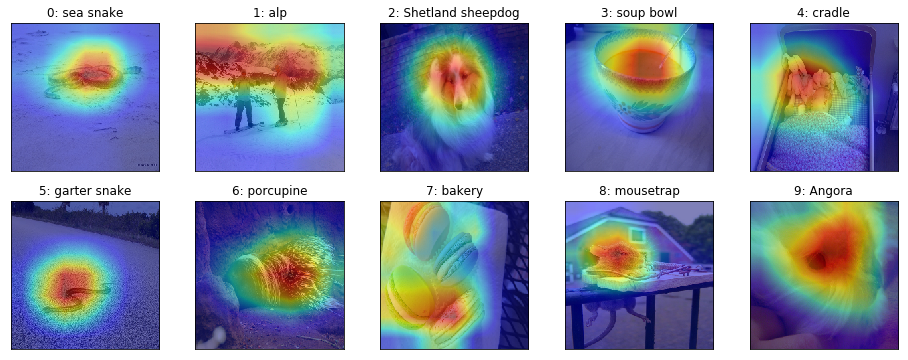

In [79]:
% matplotlib inline

net = googlenet
transformer = get_ILSVRC_net_transformer(net)
top_name = 'loss3/classifier'
bottom_name = 'inception_5b/output'
norm_deg = None
f, ax = plt.subplots(2,5)
f.set_size_inches(16,6)
idx = range(10)
for i in range(len(idx)):
    curr_ax = ax[i/5][i%5]
    img = transformer.preprocess('data', caffe.io.load_image(paths[idx[i]]))
    heatmap = compute_heatmap(net, transformer, paths[idx[i]], labels[idx[i]], heatmap_type = 'grad_cam', topBlobName = top_name, 
                    topLayerName = top_name,
                        outputBlobName = bottom_name, outputLayerName = bottom_name, secondTopBlobName = 'pool5/7x7_s1',
                        secondTopLayerName = 'pool5/7x7_s1', norm_deg = norm_deg, gpu = 0)
    curr_ax.imshow(transformer.deprocess('data', img))
    cax = curr_ax.imshow(imresize(heatmap, img.shape[1:]), alpha = 0.5, cmap = 'jet')
    #f.colorbar(cax)
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])
    curr_ax.set_title('%d: %s' % (i, get_short_class_name(labels[idx[i]], labels_desc)))
plt.show()
    

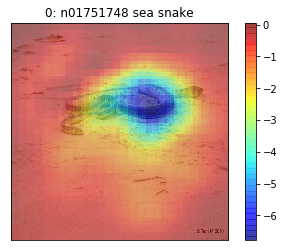

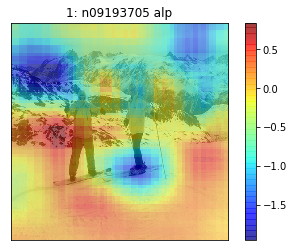

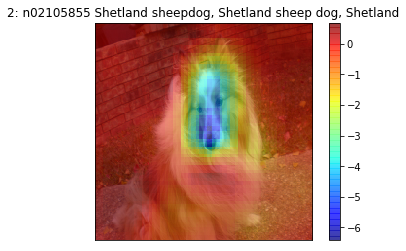

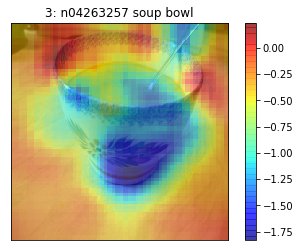

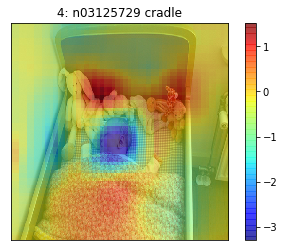

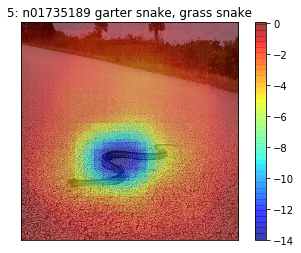

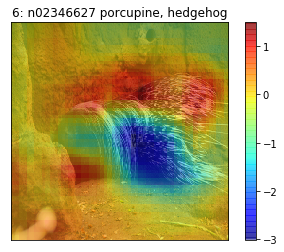

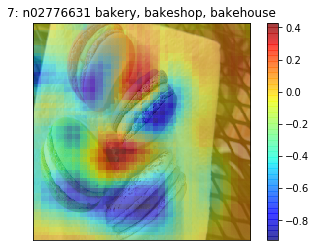

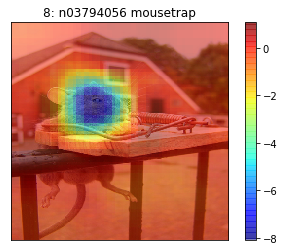

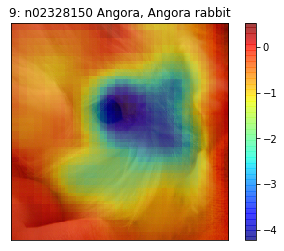

In [13]:
for i in range(10):
    img = transformer.preprocess('data', caffe.io.load_image(paths[i]))
    heatmap = np.load(os.path.join(res_dir, '%d.npy' % i))
    
    f, ax = plt.subplots(1,1)
    ax.imshow(transformer.deprocess('data', img))
    cax = ax.imshow(heatmap, alpha = 0.5, cmap = 'jet')
    f.colorbar(cax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%d: %s' % (i, labels_desc[labels[i]]))
    plt.show()
    
    